# Project data exploration - looking at relplot and scatter
Using a dataset that your group is consider using for the term project, let's do some data exploring of the different features in your dataset and their relationships

Group name: Team Steam  
Created by NAMES (SJSU IDs):  Esha Hooda (014796990),  Michael Lac (017985071),  Huy Tran (018235100)  
Last updated: 9/28/2025  
Briefly describe your dataset: This dataset, Gaming Profiles 2025, contains user activity, game details, purchase history, and pricing trends across three major platforms: Steam, PlayStation, and Xbox. For our project, we are focusing on the Steam portion of the dataset. The Steam files include information on games (gameid, title, developers, publishers, genres, supported languages, release dates), players, purchase history, achievements, reviews, social connections (friends), and price history. The dataset is real-world, large-scale, and updated regularly, making it useful for exploring player behavior, game popularity, and market dynamics through visualization and machine learning.

Import your data. If you want to mount your Google drive you can use `from google.colab import drive` and `drive.mount('/content/drive')`

### Q1: Show the number of missing data in each column of the dataframe

In [ ]:
# Your code here . . .
import kagglehub

# Download latest version
path = kagglehub.dataset_download("artyomkruglov/gaming-profiles-2025-steam-playstation-xbox")

print("Path to dataset files:", path)

100%|██████████| 889M/889M [00:09<00:00, 103MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/artyomkruglov/gaming-profiles-2025-steam-playstation-xbox/versions/1


In [ ]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

steam_games_path = os.path.join(path, "steam", "games.csv")

df = pd.read_csv(steam_games_path)
print(df.shape)
df.head()

# Q1
df.isnull().sum()

(98248, 7)


,0
gameid,0
title,3
developers,5559
publishers,5941
genres,5549
supported_languages,5506
release_date,0


### Q2: Show the data type for each column of the dataframe

In [ ]:
# Your code here . . .
df.dtypes


,0
gameid,int64
title,object
developers,object
publishers,object
genres,object
supported_languages,object
release_date,object


### Q3: Create a pair plot to show pairwise relationship in this dataset.
Draw the pairwise polynomial regression lines in a different color than the data points. Use a light color for the data points to deemphasizing the points to make the regression line stand out. Include a meaningful title to the plot.

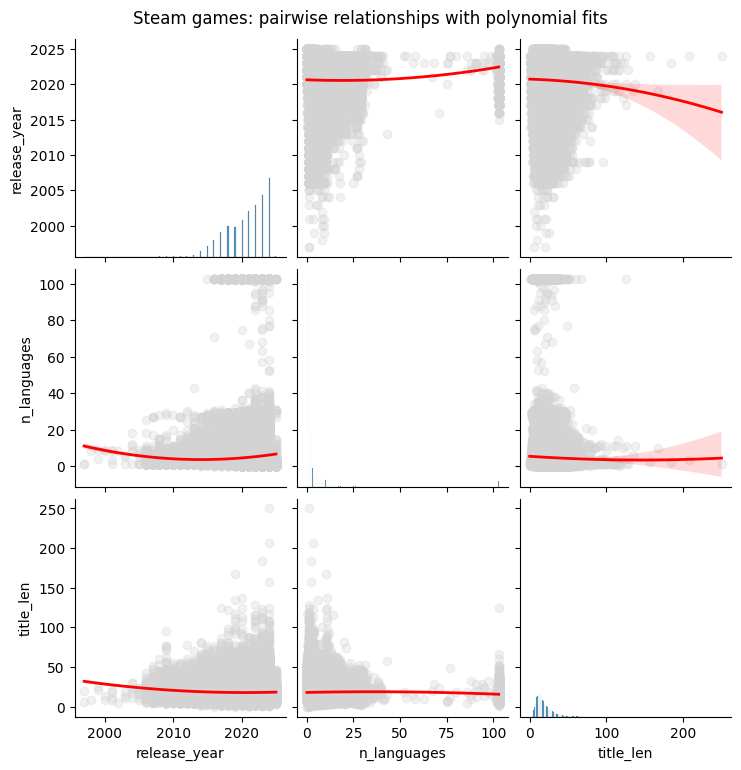

In [ ]:
# Your code here . . .
# dates and simple engineered features
df["release_date"] = pd.to_datetime(df["release_date"], errors="coerce")
df["release_year"] = df["release_date"].dt.year

# count languages
df["n_languages"] = df["supported_languages"].fillna("").apply(
    lambda x: 0 if not x else len([t for t in [s.strip() for s in x.split(",")] if t])
)

# a simple text length feature so pairplot has >1 numeric col
df["title_len"] = df["title"].fillna("").str.len()

# first listed genre to reduce categories later
df["main_genre"] = df["genres"].fillna("").apply(lambda x: x.split(",")[0].strip() if x else None)

use_cols = ["release_year", "n_languages", "title_len"]
g = sns.pairplot(
    df[use_cols].dropna(),
    kind="reg",
    plot_kws={
        "order": 2,
        "scatter_kws": {"alpha": 0.3, "color": "lightgray"},
        "line_kws": {"color": "red", "linewidth": 2}
    },
    diag_kind="hist"
)
g.fig.suptitle("Steam games: pairwise relationships with polynomial fits", y=1.02)
plt.show()



### Q4: Plot a regression line and confidence interval
Select two of the features from your dataset and create a lmplot that shows the linear regression between them. Filter your data as you see fit. Include a meaningful title for the plot.

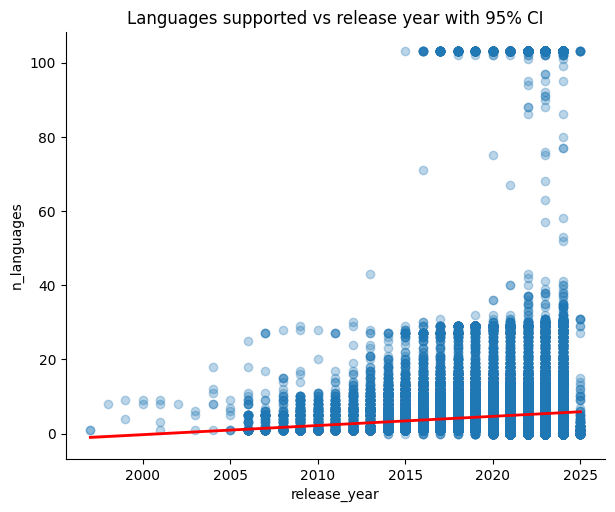

In [ ]:
# Your code here . . .
sns.lmplot(
    data=df.dropna(subset=["release_year", "n_languages"]),
    x="release_year", y="n_languages",
    scatter_kws={"alpha": 0.3},
    line_kws={"linewidth": 2, "color": "red"},
    height=5, aspect=1.25
)
plt.title("Languages supported vs release year with 95% CI")
plt.show()


### Q5. Create a relplot that shows multiple features in a single plot.
Select two features from your dataset and plot a scatter plot. Select two additional features you want to highlight in your data points using `hue` and `size`. Include a meaningful title to the plot.

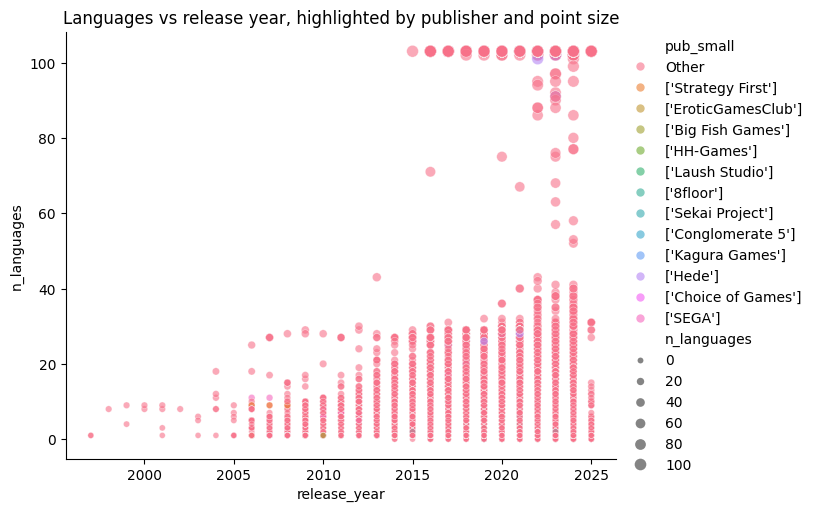

In [ ]:
# Your code here . . .
# too many publishers can clutter hue; keep top 12 by count
top_publishers = df["publishers"].value_counts().head(12).index
df_q5 = df.dropna(subset=["release_year", "n_languages"]).copy()
df_q5["pub_small"] = df_q5["publishers"].where(df_q5["publishers"].isin(top_publishers), other="Other")

g = sns.relplot(
    data=df_q5,
    x="release_year", y="n_languages",
    hue="pub_small", size="n_languages",
    kind="scatter", alpha=0.6, height=5, aspect=1.3
)
plt.title("Languages vs release year, highlighted by publisher and point size")
plt.show()


### Q6: Create a plot with small multiples plots
Select two features from your dataset and show the relationship between the features with an additional feature as the single category. Organize the multiple plots to have 3 plots per row. Set the `height` of the plot to 5 and the size the of data point to 20. Include a meaningful title in the plot.

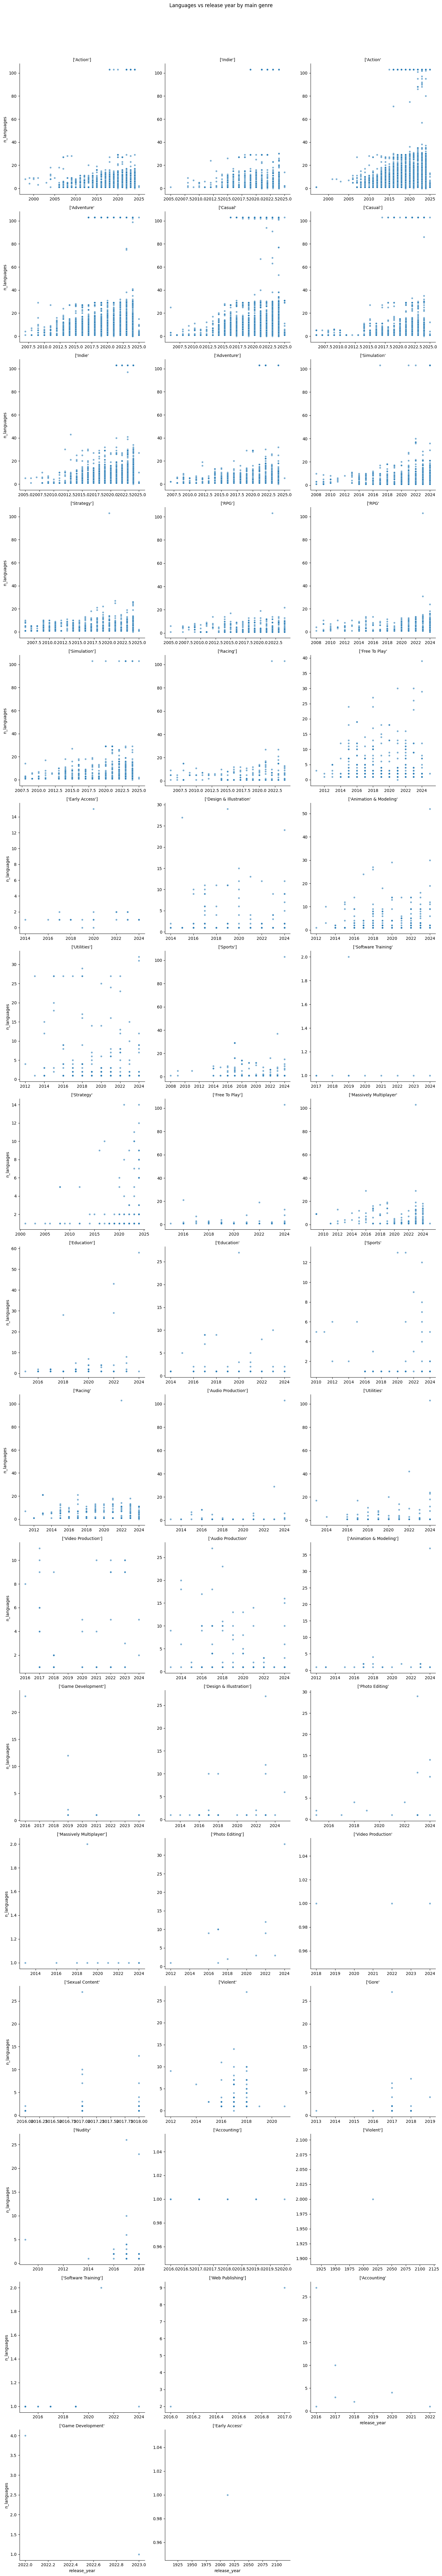

In [ ]:
# Your code here . . .
df_q6 = df.dropna(subset=["release_year", "n_languages", "main_genre"]).copy()

g = sns.relplot(
    data=df_q6,
    x="release_year", y="n_languages",
    col="main_genre", col_wrap=3,
    kind="scatter", height=5, facet_kws={"sharex": False, "sharey": False}, alpha=0.6
)

# set point size 20 across axes
for ax in g.axes.flatten():
    for coll in ax.collections:
        coll.set_sizes([20])

g.set_titles("{col_name}")
g.fig.suptitle("Languages vs release year by main genre", y=1.02)
plt.show()
